In [1]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import numpy as np

results_path = './results/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['id'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['id', 'initializationTime', 'executionTime', 'totalTime', 'algorithm','timestamp'])
results

,id,initializationTime,executionTime,totalTime,algorithm,timestamp
0,graph1,0.000018,0.004740,0.004758,parallel2,20240829151444
1,graph1,0.000020,0.005647,0.005667,parallel2,20240829152932
2,graph1,0.000019,0.003915,0.003935,parallel2,20240829182210
3,graph1,0.000026,0.004969,0.004996,parallel2,20240829183154
4,graph1,0.000025,0.005356,0.005382,parallel2,20240829184344
...,...,...,...,...,...,...
139,graph7,3.194980,276.336534,279.531515,parallel,20240829201118
140,graph7,2.678231,241.133736,243.811968,parallel,20240829201637
141,graph7,2.918254,242.808938,245.727192,parallel,20240829202158
142,graph7,3.077620,230.149856,233.227477,parallel,20240829202705


In [2]:
mean_results = results.groupby(['id', 'algorithm'])[['initializationTime', 'executionTime', 'totalTime']].mean().reset_index()
mean_results

,id,algorithm,initializationTime,executionTime,totalTime
0,graph1,parallel,0.498816,0.007369,0.506185
1,graph1,parallel2,0.000022,0.004658,0.004681
2,graph1,serial,0.000004,0.000003,0.000007
3,graph2,parallel,0.478074,0.007230,0.485304
4,graph2,parallel2,0.000025,0.004998,0.005023
5,graph2,serial,0.000004,0.000005,0.000010
6,graph3,parallel,0.464237,0.008735,0.472972
7,graph3,parallel2,0.000056,0.006733,0.006789
8,graph3,serial,0.000039,0.000944,0.000984
9,graph4,parallel,0.493377,0.037462,0.530840


In [42]:
serial_results = mean_results[mean_results['algorithm'] == 'serial']
parallel_results = mean_results[mean_results['algorithm'] == 'parallel']
parallel2_results = mean_results[mean_results['algorithm'] == 'parallel2']
#serial_results = mean_results[mean_results['algorithm'] == 'serial'][:groups]
#parallel_results = mean_results[mean_results['algorithm'] == 'parallel'][:groups]
#parallel2_results = mean_results[mean_results['algorithm'] == 'parallel2'][:groups]
#x = np.arange(groups)
x_serial = np.arange(len(serial_results))-0.2
x_parallel = np.arange(len(parallel_results))
x_parallel2 = np.arange(len(parallel2_results))+0.2
x_serial_line = np.arange(len(serial_results))
x_parallel_line = np.arange(len(parallel_results))
x_parallel2_line = np.arange(len(parallel2_results))
width = 0.2
max_length = max(len(serial_results),len(parallel_results),len(parallel2_results))
ticks = [f'graph_{i}' for i in range(1, max_length+1)]
linestyle = 'dashed'
colors = ['blue', 'red', 'orange']

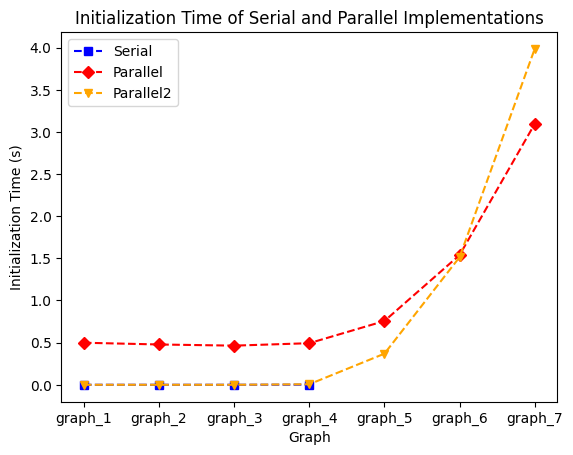

In [43]:
plt.plot(x_serial_line, serial_results['initializationTime'], label='Serial', marker='s', linestyle=linestyle, color=colors[0])
plt.plot(x_parallel_line, parallel_results['initializationTime'], label='Parallel', marker='D', linestyle=linestyle, color=colors[1])
plt.plot(x_parallel2_line, parallel2_results['initializationTime'], label='Parallel2', marker='v', linestyle=linestyle, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Initialization Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Initialization Time (s)')
plt.show()

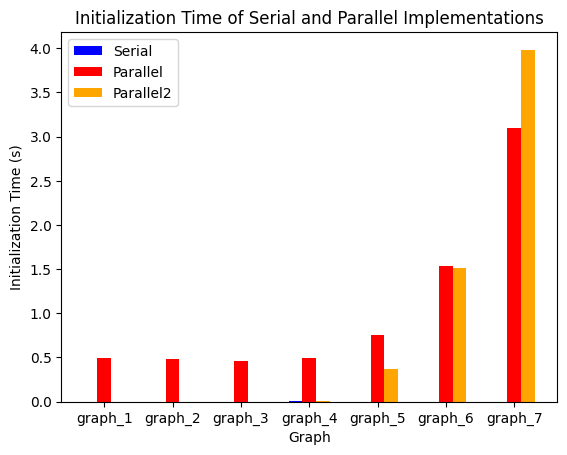

In [44]:
plt.bar(x_serial, serial_results['initializationTime'], label='Serial', width=width, color=colors[0])
plt.bar(x_parallel, parallel_results['initializationTime'], label='Parallel', width=width, color=colors[1])
plt.bar(x_parallel2, parallel2_results['initializationTime'], label='Parallel2', width=width, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Initialization Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Initialization Time (s)')
plt.show()

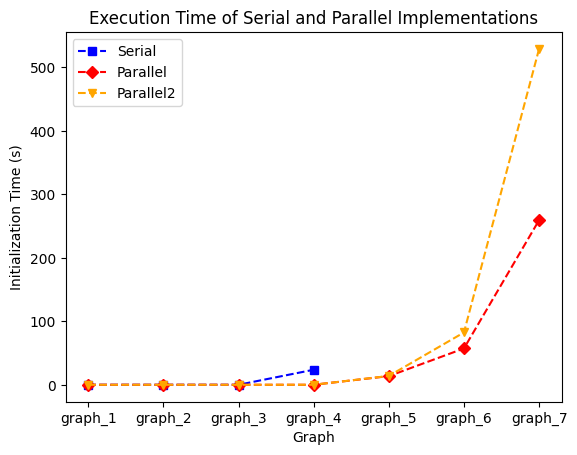

In [46]:
plt.plot(x_serial_line, serial_results['executionTime'], label='Serial', marker='s', linestyle=linestyle, color=colors[0])
plt.plot(x_parallel_line, parallel_results['executionTime'], label='Parallel', marker='D', linestyle=linestyle, color=colors[1])
plt.plot(x_parallel2_line, parallel2_results['executionTime'], label='Parallel2', marker='v', linestyle=linestyle, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Execution Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Initialization Time (s)')
plt.show()

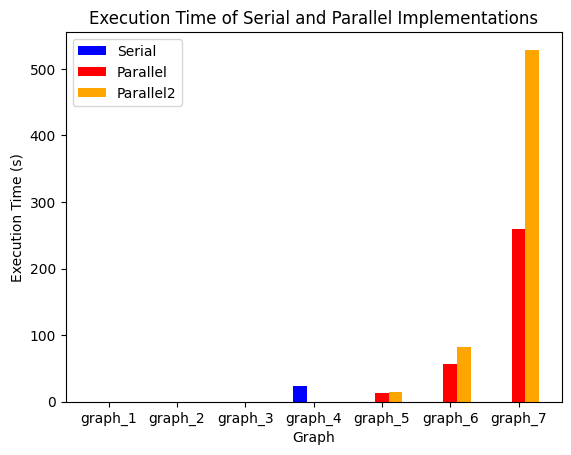

In [47]:
plt.bar(x_serial, serial_results['executionTime'], label='Serial', width=width, color=colors[0])
plt.bar(x_parallel, parallel_results['executionTime'], label='Parallel', width=width, color=colors[1])
plt.bar(x_parallel2, parallel2_results['executionTime'], label='Parallel2', width=width, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Execution Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.show()

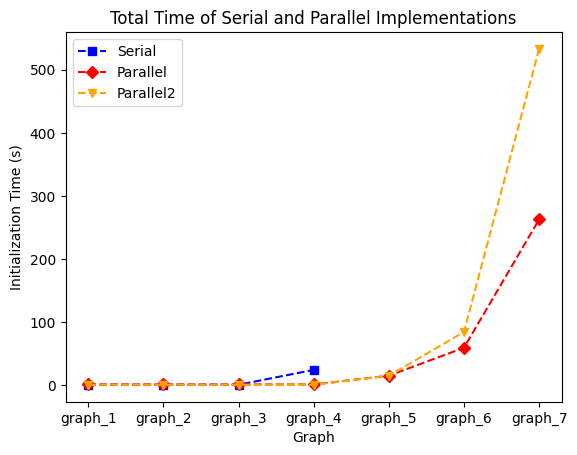

In [48]:
plt.plot(x_serial_line, serial_results['totalTime'], label='Serial', marker='s', linestyle=linestyle, color=colors[0])
plt.plot(x_parallel_line, parallel_results['totalTime'], label='Parallel', marker='D', linestyle=linestyle, color=colors[1])
plt.plot(x_parallel2_line, parallel2_results['totalTime'], label='Parallel2', marker='v', linestyle=linestyle, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Total Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Initialization Time (s)')
plt.show()

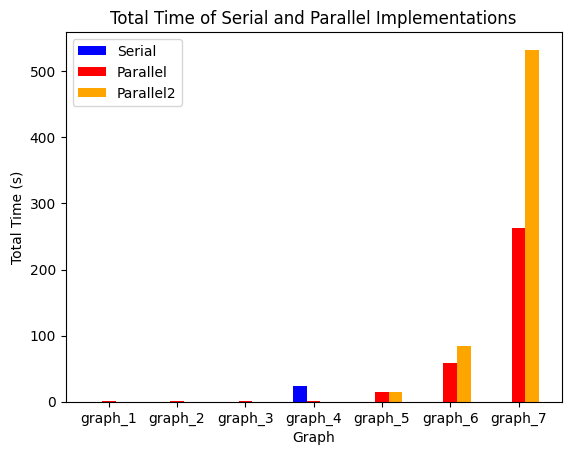

In [49]:
plt.bar(x_serial, serial_results['totalTime'], label='Serial', width=width, color=colors[0])
plt.bar(x_parallel, parallel_results['totalTime'], label='Parallel', width=width, color=colors[1])
plt.bar(x_parallel2, parallel2_results['totalTime'], label='Parallel2', width=width, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Total Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Total Time (s)')
plt.show()